### Imports

<img src="https://mt.mahidol.ac.th/wp-content/uploads/2019/10/OriginalLOGO.png">

### QSAR Modelling of Steroid sul fatase inhibitors

In [3]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from matplotlib import style
import tpot
import time
import random
style.use("ggplot")

C:\Users\MMOHTASHIM\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\MMOHTASHIM\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
# import os
# os.chdir('/content/gdrive/My Drive/Research Assistant Center for Data Mining')
df=pd.read_csv("data.csv")

<p> There are 5 rows and 883 columns for the dataset</p>

In [6]:
df.head()

,Name,pChEMBL.Value,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL122840,4.78,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL136664,6.55,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL349091,6.30,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL76374,4.98,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL420395,5.47,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Distribution of pChEMBL value

Text(0.5,1,'pChEMBL distribution')

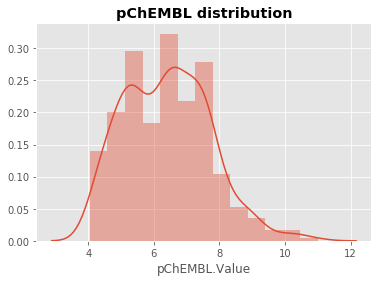

In [7]:
sns.distplot(df["pChEMBL.Value"])
plt.title("pChEMBL distribution",fontweight="bold")

### Idenitifying useless features 
<p>In an effort to identify useless features, features which have no standard deviation have been identified i.e features which remain a constant throughout.

In [8]:
values=np.array(df.iloc[:,3:].T)
variation=[]
s=-1
for i in values:
    s+=1
    if np.std(i)==0:
        variation.append("PubchemFP{}".format(s))
        

print("The following columns has no variations i.e std is zero:--{}".format(variation))

The following columns has no variations i.e std is zero:--['PubchemFP3', 'PubchemFP4', 'PubchemFP6', 'PubchemFP7', 'PubchemFP8', 'PubchemFP9', 'PubchemFP16', 'PubchemFP21', 'PubchemFP25', 'PubchemFP26', 'PubchemFP28', 'PubchemFP30', 'PubchemFP31', 'PubchemFP34', 'PubchemFP35', 'PubchemFP38', 'PubchemFP39', 'PubchemFP40', 'PubchemFP41', 'PubchemFP44', 'PubchemFP46', 'PubchemFP47', 'PubchemFP48', 'PubchemFP49', 'PubchemFP50', 'PubchemFP51', 'PubchemFP52', 'PubchemFP53', 'PubchemFP54', 'PubchemFP55', 'PubchemFP56', 'PubchemFP57', 'PubchemFP58', 'PubchemFP59', 'PubchemFP60', 'PubchemFP61', 'PubchemFP62', 'PubchemFP63', 'PubchemFP64', 'PubchemFP65', 'PubchemFP66', 'PubchemFP67', 'PubchemFP68', 'PubchemFP69', 'PubchemFP70', 'PubchemFP71', 'PubchemFP72', 'PubchemFP73', 'PubchemFP74', 'PubchemFP75', 'PubchemFP76', 'PubchemFP77', 'PubchemFP78', 'PubchemFP79', 'PubchemFP80', 'PubchemFP81', 'PubchemFP82', 'PubchemFP83', 'PubchemFP84', 'PubchemFP85', 'PubchemFP86', 'PubchemFP87', 'PubchemFP88', 'P

In [9]:
df.iloc[:,3:].T

,0,1,2,3,4,5,6,7,8,9,...,419,420,421,422,423,424,425,426,427,428
PubchemFP1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
PubchemFP2,1,1,1,0,1,1,1,0,0,0,...,1,1,0,0,1,1,1,1,1,1
PubchemFP3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PubchemFP4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PubchemFP5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PubchemFP876,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PubchemFP877,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PubchemFP878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PubchemFP879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
np.array(df.iloc[:,3:])

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
df.isnull().sum()##checking for null values

Name             0
pChEMBL.Value    0
PubchemFP0       0
PubchemFP1       0
PubchemFP2       0
                ..
PubchemFP876     0
PubchemFP877     0
PubchemFP878     0
PubchemFP879     0
PubchemFP880     0
Length: 883, dtype: int64

Text(0.5,1,'Heatmap for features')

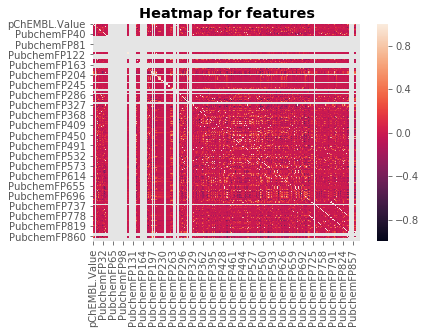

In [12]:
sns.heatmap(df.corr())
plt.title("Heatmap for features",fontweight="bold")

### PCA 

<p> I noticed that there is alot of multi-collinearity among the given features and therefore I decided to reduce the 
number of features using the Linear Technique called Princple Compnent Analysis. The function below, plots the variance explained
by each compenent in reduced vector space generate by PCA and the output of the function is explained-variance by each
component</p>

In [13]:
def PCA_function(n_compnents,visual=True):
    X=df.drop(["pChEMBL.Value","Name"],1)
    y=df["pChEMBL.Value"]
    pca=PCA(n_compnents)
    X_reduced=pca.fit_transform(X)
    ratio=pca.explained_variance_ratio_
    sums=np.sum(ratio)
    cummulative_sums=[]
    sums_cums=0
    for i in ratio:
        sums_cums+=i
        cummulative_sums.append(sums_cums)
    if visual:
        ax=plt.subplot(111)
        x_labels=[str(i) for i in range(n_compnents)]
        x_numeric=[i for i in range(n_compnents)]
        ax2 = ax.twinx()
        ax.bar(x_labels,ratio)
        ax2.plot(x_numeric,cummulative_sums,color="black")
        ax2.set_ylabel('Cumulative Variance', color='black')
        ax.set_title("Explained variance with n={}".format(n_compnents))
        ax.set_xlabel("Components")
        ax.set_ylabel("Ratio")
        plt.grid(False)
    print("The total variance ratio is:{}".format(sums))
    return ratio

The total variance ratio is:0.31600438243817774


array([0.16563154, 0.15037285])

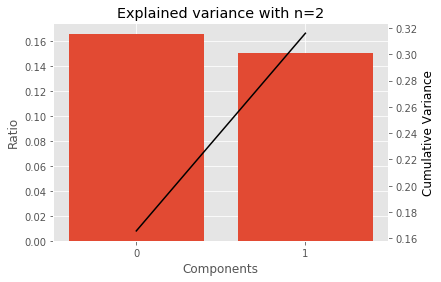

In [14]:
PCA_function(n_compnents=2)

The total variance ratio is:0.4114674960339133


array([0.16563154, 0.15037285, 0.09546311])

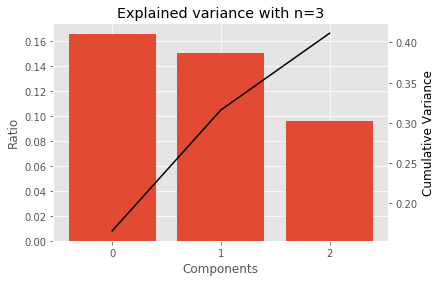

In [15]:
PCA_function(n_compnents=3)

The total variance ratio is:0.4916515586369435


array([0.16563154, 0.15037285, 0.09546311, 0.08018406])

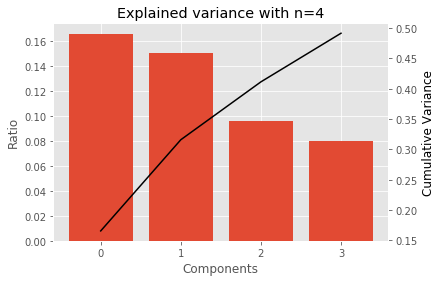

In [16]:
PCA_function(n_compnents=4)

The total variance ratio is:0.5509855003436257


array([0.16563154, 0.15037285, 0.09546311, 0.08018406, 0.05933394])

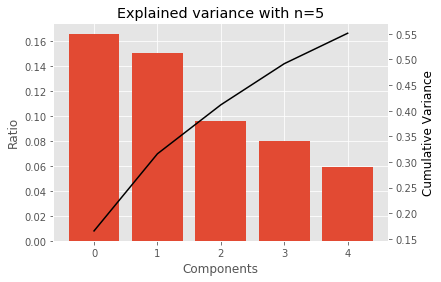

In [17]:
PCA_function(n_compnents=5)

The total variance ratio is:0.5900689355184776


array([0.16563154, 0.15037285, 0.09546311, 0.08018406, 0.05933394,
       0.03908344])

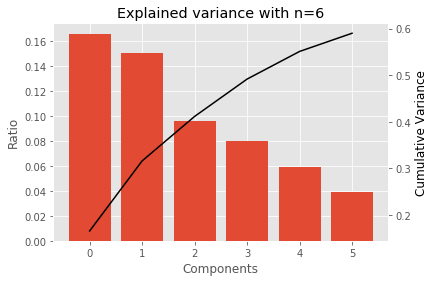

In [18]:
PCA_function(n_compnents=6)

The total variance ratio is:0.6263854641515754


array([0.16563154, 0.15037285, 0.09546311, 0.08018406, 0.05933394,
       0.03908344, 0.03631653])

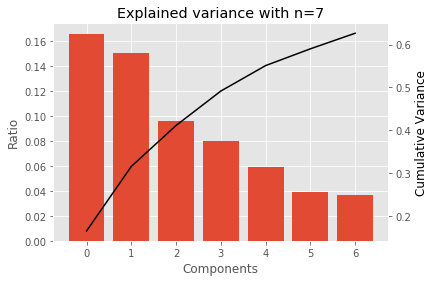

In [19]:
PCA_function(n_compnents=7)

The total variance ratio is:0.6601428011549353


array([0.16563154, 0.15037285, 0.09546311, 0.08018406, 0.05933394,
       0.03908344, 0.03631653, 0.03375734])

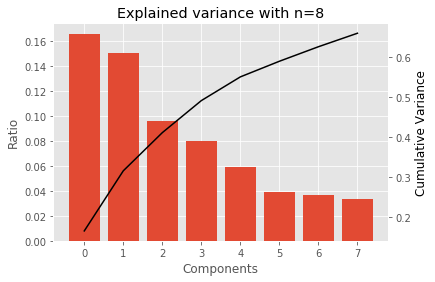

In [20]:
PCA_function(n_compnents=8)

The total variance ratio is:0.6853363382943388


array([0.16563154, 0.15037285, 0.09546311, 0.08018406, 0.05933394,
       0.03908344, 0.03631653, 0.03375734, 0.02519354])

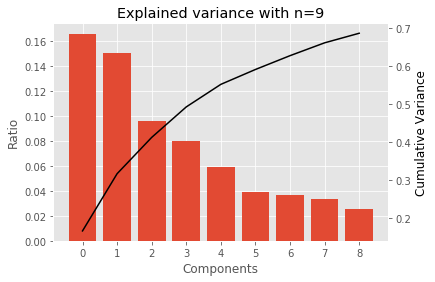

In [21]:
PCA_function(n_compnents=9)

The total variance ratio is:0.7072467254515613


array([0.16563154, 0.15037285, 0.09546311, 0.08018406, 0.05933394,
       0.03908344, 0.03631653, 0.03375734, 0.02519354, 0.02191038])

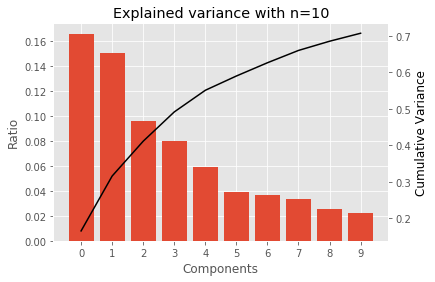

In [22]:
PCA_function(n_compnents=10)

In [23]:
def best_ncompnents(threshold):
    '''
    This function is used to optimize the number of components for PCA since there is infinite number of choice available.
    The herustic I have used to optimize the N-Component is simple, I ran the PCA for n-compenents ranging from 3 to 50 and then
    picked the variance explained by the newly added compenent. If this variance is significant enough than I kept on adding the
    component, but if  the variance explained by the last newly added component is below threshold,it become insignificant to add the 
    new component therefore function stops running.
    
    Please note that threshold is an hyperparameter given by the user....

    '''
    for n in range(3,50):
        ratio=PCA_function(n_compnents=n,visual=False)
        print(ratio[-1])
        if ratio[-1]<threshold:
            return n
best_ncompnents(0.01)

The total variance ratio is:0.41146749603338495
0.09546311359520698
The total variance ratio is:0.491651558636892
0.08018406260292497
The total variance ratio is:0.5509855003459093
0.05933394170904822
The total variance ratio is:0.5900689358508605
0.03908343550605809
The total variance ratio is:0.6263854640589117
0.03631652825272953
The total variance ratio is:0.6601427996789987
0.033757335863701735
The total variance ratio is:0.6853363422478134
0.025193541075437784
The total variance ratio is:0.7072467258299201
0.021910382077468565
The total variance ratio is:0.7259223723066064
0.01867564425793082
The total variance ratio is:0.7436133782134954
0.01769101067876627
The total variance ratio is:0.7592757777323594
0.015662390870612834
The total variance ratio is:0.7741385696362094
0.01486271584048048
The total variance ratio is:0.7872569463062885
0.013118374591290094
The total variance ratio is:0.7987341661331856
0.011477213046268343
The total variance ratio is:0.8101898419696419
0.0114556

20

The total variance ratio is:0.8394406743565248


array([0.16563154, 0.15037285, 0.09546311, 0.08018406, 0.05933394,
       0.03908344, 0.03631653, 0.03375734, 0.02519354, 0.02191039,
       0.01867565, 0.01769101, 0.01566247, 0.01486272, 0.01311838,
       0.01147723, 0.01145568, 0.01038122, 0.01008178, 0.00878781])

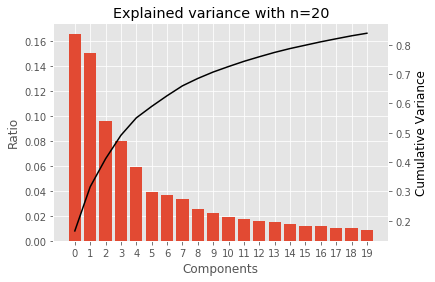

In [24]:
PCA_function(n_compnents=20)##according to my herustic n=20 is good enough with threshold taken as 0.01

In [25]:
X=df.drop(["pChEMBL.Value","Name"],1)
y=df["pChEMBL.Value"]
pca=PCA(20)
X_reduced=pca.fit_transform(X)

In [26]:
X_reduced.shape

(429, 20)

### Setting Machine Learning Model Parameter and Benchmarking

In [27]:
def machine_learning_train(machine_learning_algorithm,X,y,trials):
    ''''
    This function essentialy takes the Dimensionaly Reduced X-features and then train it on an Machine Learning
    Algorithm specified by the user and then test it using different two metric:R2 Score and MSE.However note that training is done
    for a specific number of trials for an 80/20 split and respectively tested. The plots shows results of metrics over trials.
    
    '''
    
    style.use("ggplot")
    clf=machine_learning_algorithm
    r2_train=[]
    r2_test=[]
    mse_train=[]
    mse_test=[]
    
    for i in range(trials):
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)##80/20 indpedent split
        clf.fit(X_train,y_train)##training
        
        y_pred_train=clf.predict(X_train)
        y_pred_test=clf.predict(X_test)##testing
        
        r2_train.append(r2_score(y_train,y_pred_train))
        r2_test.append(r2_score(y_test,y_pred_test))
        mse_train.append(mean_squared_error(y_train,y_pred_train))
        mse_test.append(mean_squared_error(y_test,y_pred_test))
        
        
    print("The mean R2 score for {} is {}--Train".format(str(machine_learning_algorithm),np.mean(r2_train)))
    print("The mean R2 score for {} is {}--Test".format(str(machine_learning_algorithm),np.mean(r2_test)))
    
    print("The mean MSE score for {} is {}--Train".format(str(machine_learning_algorithm),np.mean(mse_train)))
    print("The mean MSE score for {} is {}--Test".format(str(machine_learning_algorithm),np.mean(mse_test)))
    
    fig, axs = plt.subplots(2, 2)
    fig.set_size_inches(11,8)
    axs[0, 0].plot(list(range(trials)), r2_train,'tab:red')
    axs[0, 0].set_title('R2--Score--Train--{}--trials'.format(trials))
    axs[0, 0].set_ylabel("R2 Score")
    
    
    
    axs[0, 1].plot(list(range(trials)), r2_test, 'tab:orange')
    axs[0, 1].set_title('R2--Score--Test--{}--trials'.format(trials))
    axs[1, 0].plot(list(range(trials)), mse_train,'tab:blue')
    
    
    axs[1, 0].set_title('MSE--Score--Train--{}--trials'.format(trials))
    axs[1, 0].set_ylabel("MSE Score")
    axs[1, 0].set_xlabel("Trials")
    axs[1, 1].plot(list(range(trials)), mse_test,'tab:purple')
    axs[1, 1].set_title('MSE--Score--Test--{}--trials'.format(trials))
    axs[1, 1].set_xlabel("Trials")
    
    
    axs[0,0].set_ylim([0,1])
    axs[0,1].set_ylim([0,1])
    axs[1,0].set_ylim([0,2])
    axs[1,1].set_ylim([0,2])
    plt.grid(False)
    
    return (r2_train,r2_test,mse_train,mse_test)
   
    
    

In [73]:
def scrambled_pair_prediction(machine_learning_algorithm,X,y,trials):
    style.use("classic")
    
    
    clf=machine_learning_algorithm

    r2_test_scrambled=[]
    r2_test_orginal=[]
    r2_train_orginal=[]
    r2_train_scrambled=[]
    y_pred_test_scrambled=[]
    y_pred_train_scrambled=[]
    y_pred_test=[]
    y_pred_train=[]
    y_train_combined=[]
    y_train_scrambled_combined=[]
    y_test_combined=[]
    y_test_scrambled_combined=[]

    
    for i in range(10):##10 time shuffled
        X_shuffled=np.copy(X_reduced)
        y_shuffled=np.copy(y)
        np.random.shuffle(X_shuffled)
        np.random.shuffle(y_shuffled)
        X_train_scrambled,X_test_scrambled,y_train_scrambled,y_test_scrambled=train_test_split(X_shuffled,y_shuffled,test_size=0.2)##80/20 indpedent split on scrambled data

        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)##80/20 indpedent split on orginal
        for i in range(trials):##for each shuffled ,run this many times of this trial and collect the revelant for later plotting
            y_pred_test_scrambled_trial=[]
            y_pred_train_scrambled_trial=[]
            y_pred_test_trial=[]
            y_pred_train_trial=[]

            
            clf.fit(X_train_scrambled,y_train_scrambled)
            y_pred_test_scrambled_trial=clf.predict(X_test_scrambled)##testing on scrambled data
            y_pred_train_scrambled_trial=clf.predict(X_train_scrambled)##testing on scrambled data

            clf.fit(X_train,y_train)
            y_pred_test_trial=clf.predict(X_test)##testing on unscrambled data
            y_pred_train_trial=clf.predict(X_train)##testing on scrambled data
            
            y_pred_test_scrambled.append(y_pred_test_scrambled_trial)
            y_pred_train_scrambled.append(y_pred_train_scrambled_trial)
            y_pred_test.append(y_pred_test_trial)
            y_pred_train.append(y_pred_train_trial)
            y_train_combined.append(y_train)
            y_train_scrambled_combined.append(y_train_scrambled)
            y_test_combined.append(y_test)
            y_test_scrambled_combined.append(y_test_scrambled)
            
            r2_test_scrambled.append(r2_score(y_test_scrambled,y_pred_test_scrambled_trial))
            r2_test_orginal.append(r2_score(y_test,y_pred_test_trial))


            r2_train_scrambled.append(r2_score(y_train_scrambled,y_pred_train_scrambled_trial))
            r2_train_orginal.append(r2_score(y_train,y_pred_train_trial))
        
    
    fig=plt.figure()
    fig.set_facecolor('white')
    fig.set_size_inches(14,14)
    ax1=fig.add_subplot(211)
    ax2=fig.add_subplot(212)
   
        
    ax1.grid(False)
    ax2.grid(False)

    
    ax1.scatter(np.array(y_test_combined).reshape(-1,),np.array(y_pred_test).reshape(-1,),c='red',label='Orginal')
    ax1.set_title('Predicted vs Orginal pChEMBL--Test Data')
    
    
    ax1.scatter(np.array(y_test_scrambled_combined).reshape(-1,), np.array(y_pred_test_scrambled).reshape(-1,),c='blue',label='Scrambled')
    
    
    
    ax2.scatter(np.array(r2_test_scrambled).reshape(-1,),np.array(r2_test_orginal).reshape(-1,),c='red',label="test")
    ax2.set_title('R2 for Scrambled vs Orginal')
    
    ax2.scatter(np.array(r2_train_scrambled).reshape(-1),np.array(r2_train_orginal).reshape(-1,),c='blue',label="train")
   
    
#     fig.text(0.02, 0.5, 'Predicted pChEMBL', ha='center',fontweight="bold")
#     fig.text(0.5,0.5,'R2-Orginal',ha='center',fontweight="bold")
    
    ax1.legend(loc=4)
    ax2.legend(loc=4)
    ax1.set_xlabel("Experimental pChEMBL",fontweight="bold")
    ax2.set_xlabel("R2-Scrambled",fontweight="bold")
    
    
    ax1.set_ylabel("Predicted pChEMBL",fontweight="bold")
    ax2.set_ylabel("R2-Orginal",fontweight="bold")
    
    
    
    
    
        
        
        
    

### Gradient Boosting

The mean R2 score for GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) is 0.9039351605318566--Train
The mean R2 score for GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurit

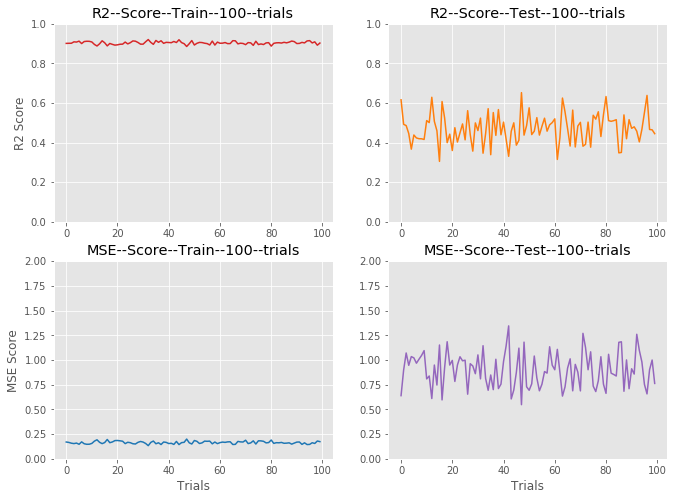

In [29]:
r2_train_gb,r2_test_gb,mse_train_gb,mse_test_gb=machine_learning_train(GradientBoostingRegressor(),X_reduced,y,100)

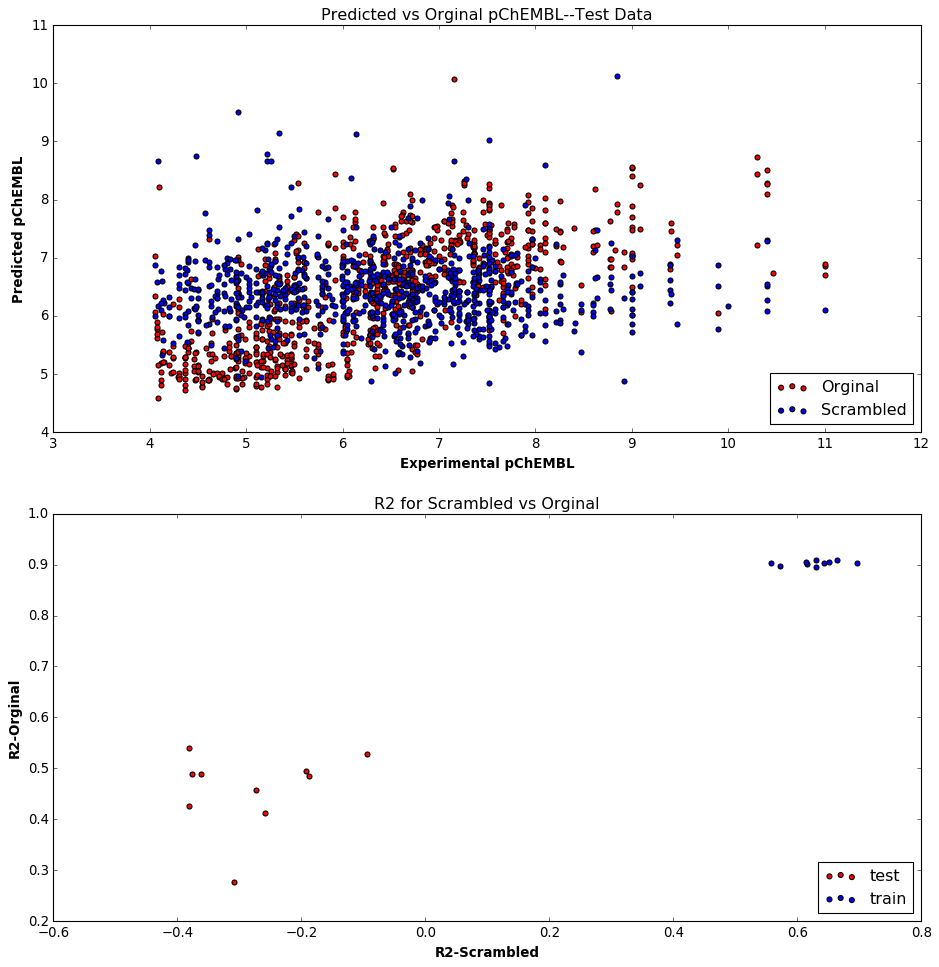

In [74]:
scrambled_pair_prediction(GradientBoostingRegressor(),X_reduced,y,1)

### Support Vector Regression

The mean R2 score for SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) is 0.6159761183491488--Train
The mean R2 score for SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) is 0.4798847536828162--Test
The mean MSE score for SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) is 0.6533072124903287--Train
The mean MSE score for SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) is 0.911770237717708--Test


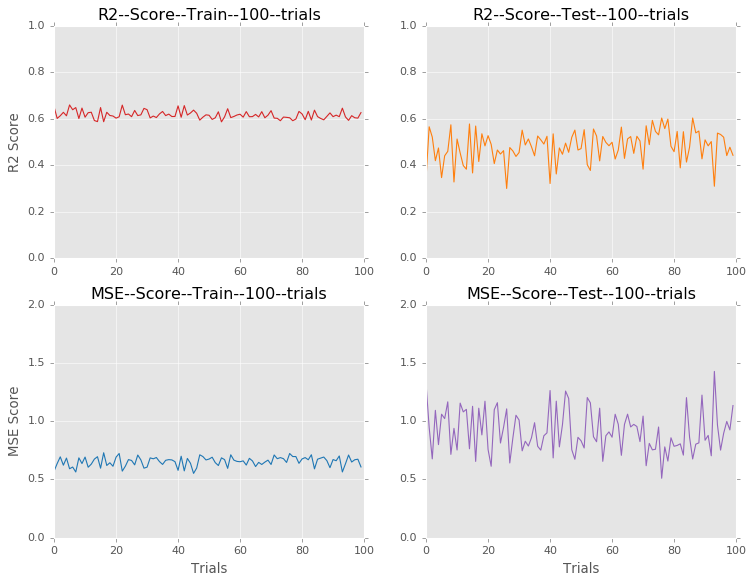

In [30]:
r2_train_svr,r2_test_svr,mse_train_svr,mse_test_svr=machine_learning_train(SVR(),X_reduced,y,100)

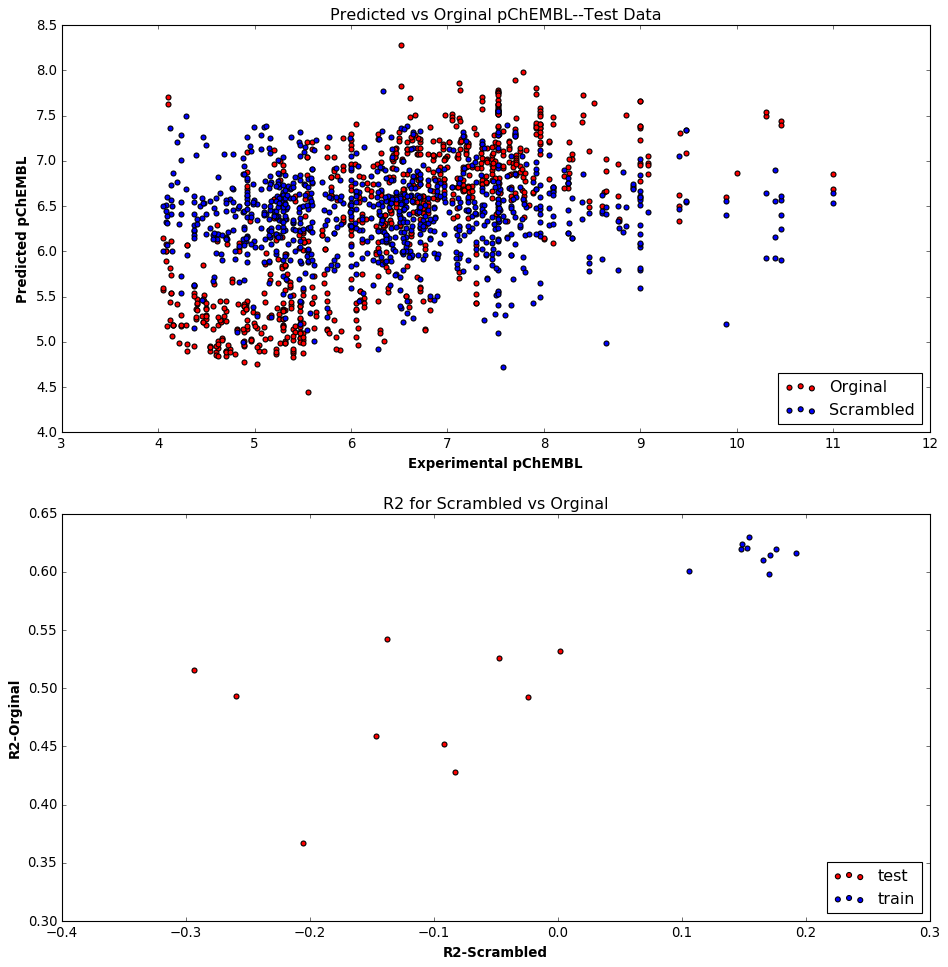

In [75]:
scrambled_pair_prediction(SVR(),X_reduced,y,1)

### Linear Regression

The mean R2 score for LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is 0.44137161039059164--Train
The mean R2 score for LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is 0.3662064629737988--Test
The mean MSE score for LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is 0.9545901964194408--Train
The mean MSE score for LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is 1.0875898772195003--Test


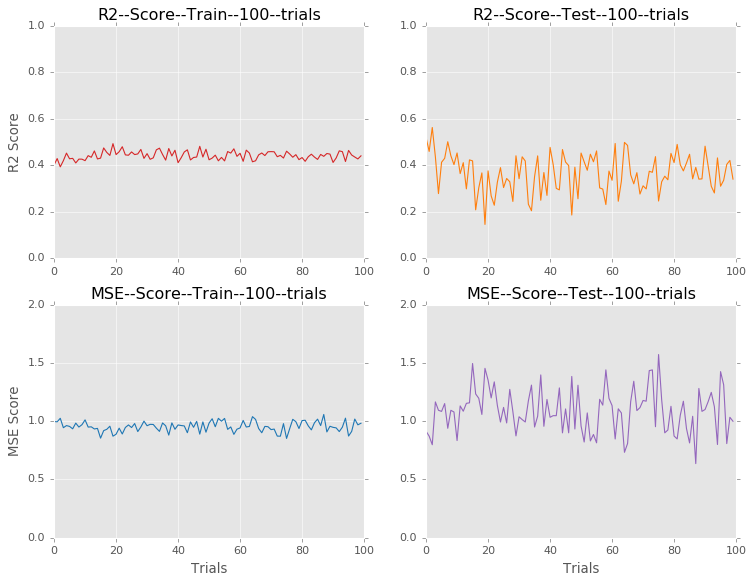

In [32]:
r2_train_lr,r2_test_lr,mse_train_lr,mse_test_lr=machine_learning_train(LinearRegression(),X_reduced,y,100)

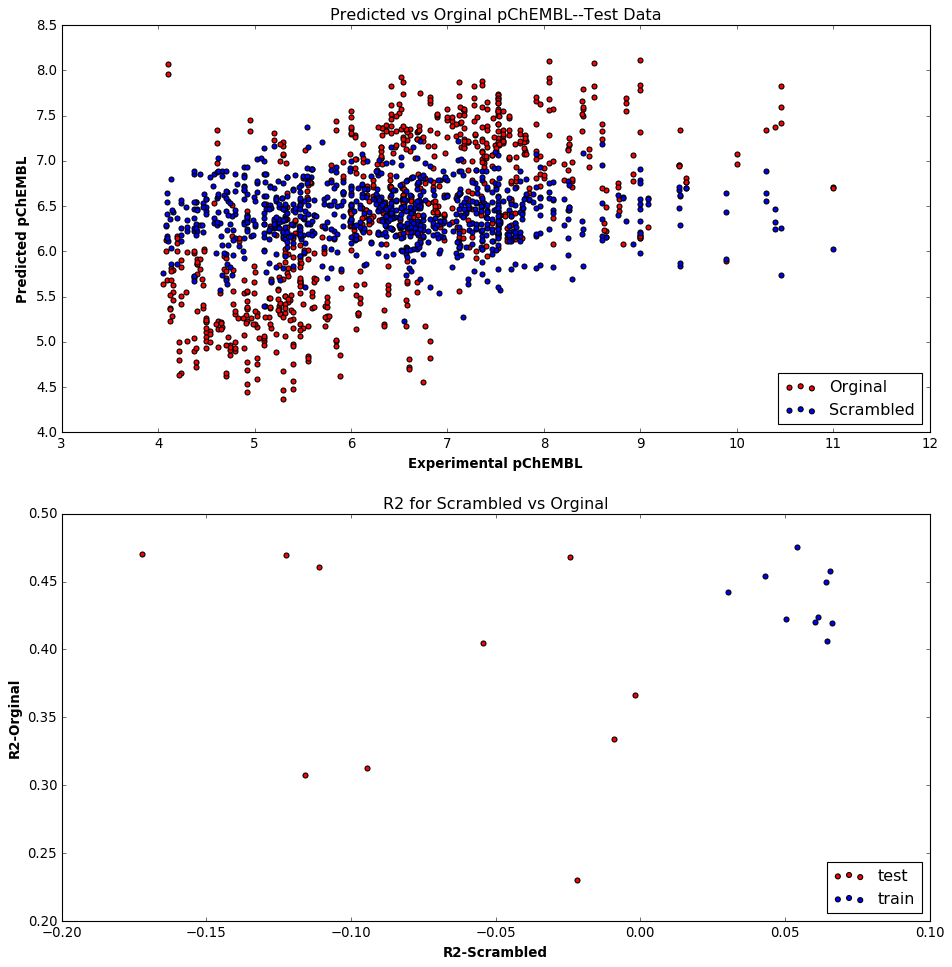

In [76]:
scrambled_pair_prediction(LinearRegression(),X_reduced,y,1)

### Lasso Regression

The mean R2 score for Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) is 0.014885577550190779--Train
The mean R2 score for Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) is -0.0036695686206635347--Test
The mean MSE score for Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) is 1.6879522416913064--Train
The mean MSE score for Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) is 1.7050409687943031--Test


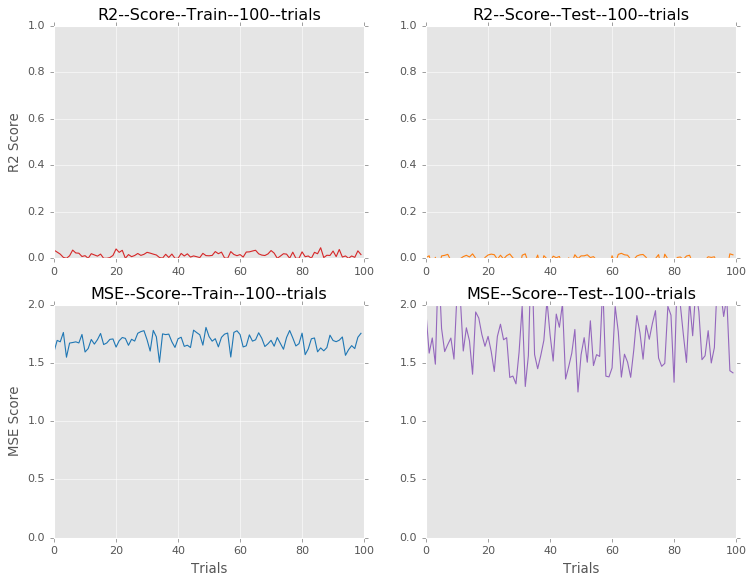

In [34]:
r2_train_lasso,r2_test_lasso,mse_train_lasso,mse_test_lasso=machine_learning_train(Lasso(),X_reduced,y,100)

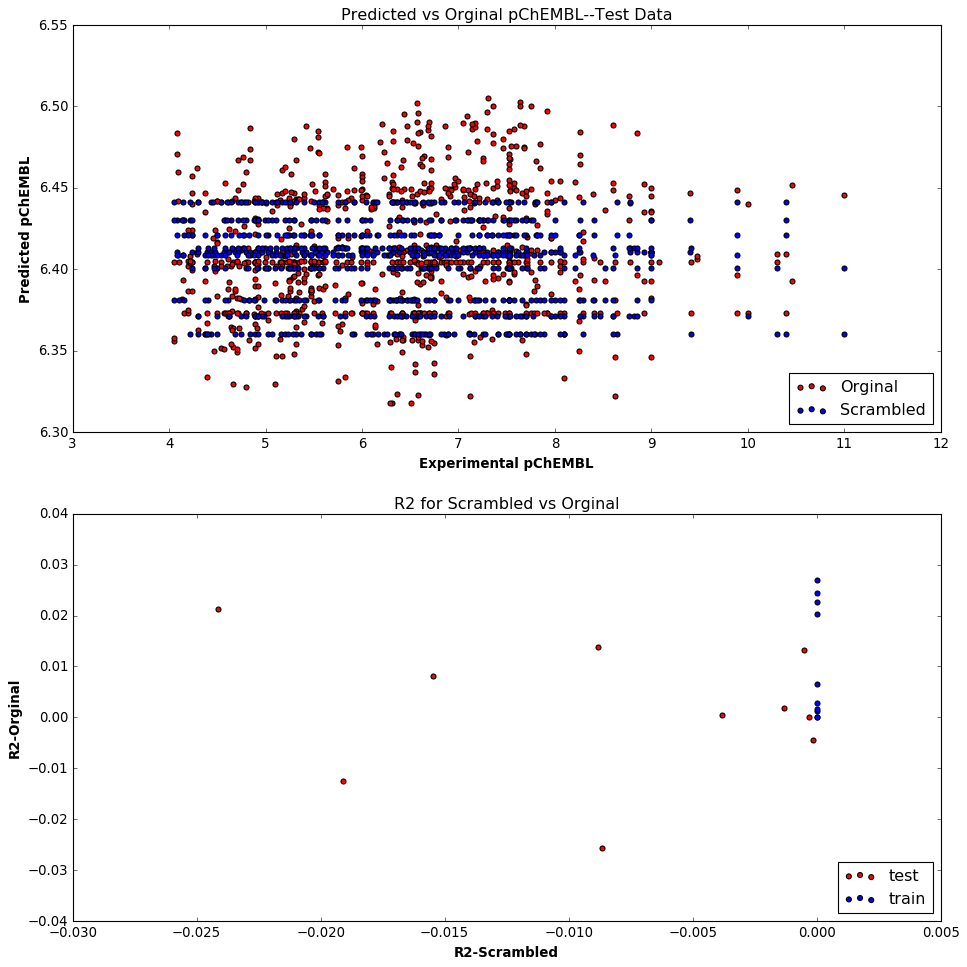

In [77]:
scrambled_pair_prediction(Lasso(),X_reduced,y,1)

### Ridge Regression

The mean R2 score for Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) is 0.4398380219331752--Train
The mean R2 score for Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) is 0.3749217461631642--Test
The mean MSE score for Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) is 0.9595418561910184--Train
The mean MSE score for Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) is 1.0633751625341439--Test


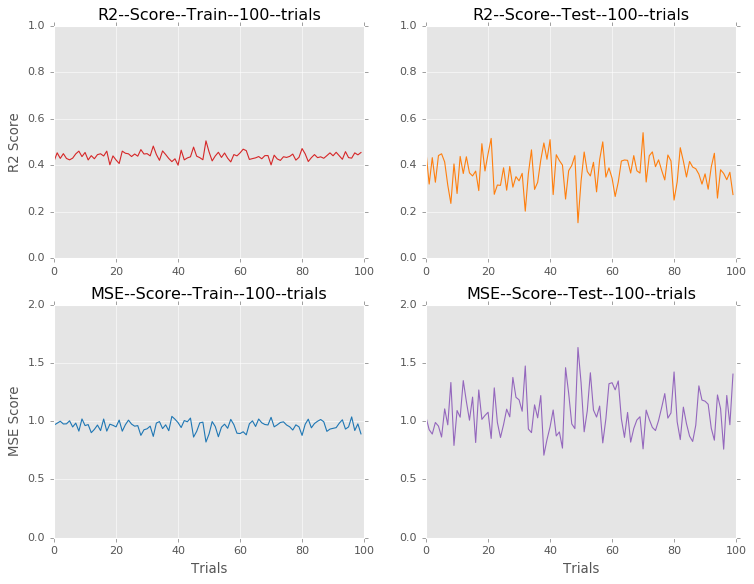

In [69]:
r2_train_ridge,r2_test_ridge,mse_train_ridge,mse_test_ridge=machine_learning_train(Ridge(),X_reduced,y,100)

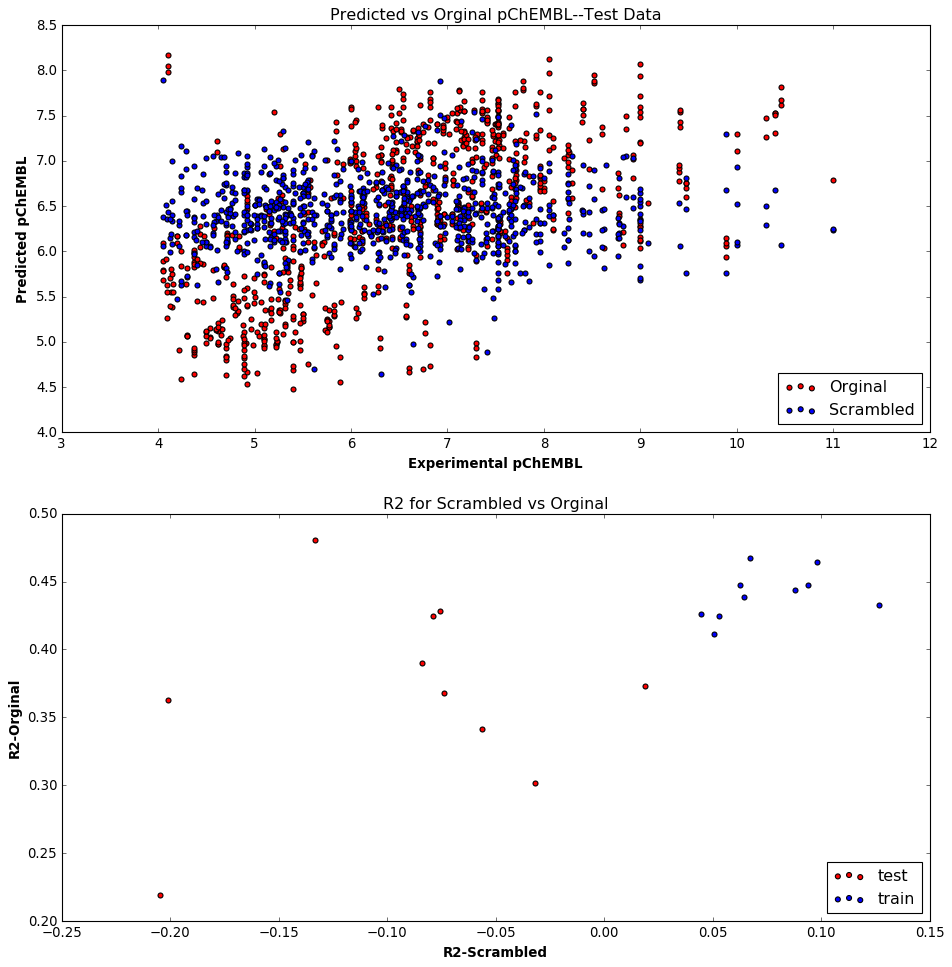

In [78]:
scrambled_pair_prediction(Ridge(),X_reduced,y,1)

### Random Forest Regression

The mean R2 score for RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) is 0.9238936957528807--Train
The mean R2 score for RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
   

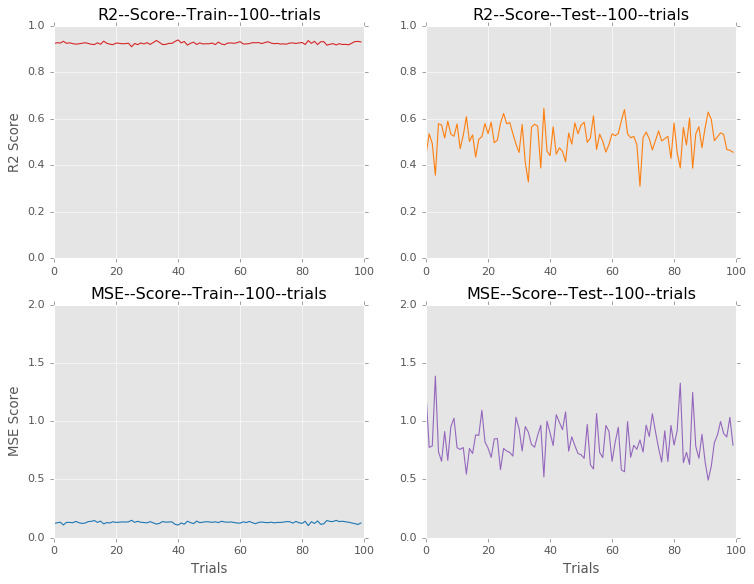

In [38]:
r2_train_rf,r2_test_rf,mse_train_rf,mse_test_rf=machine_learning_train(RandomForestRegressor(),X_reduced,y,100)

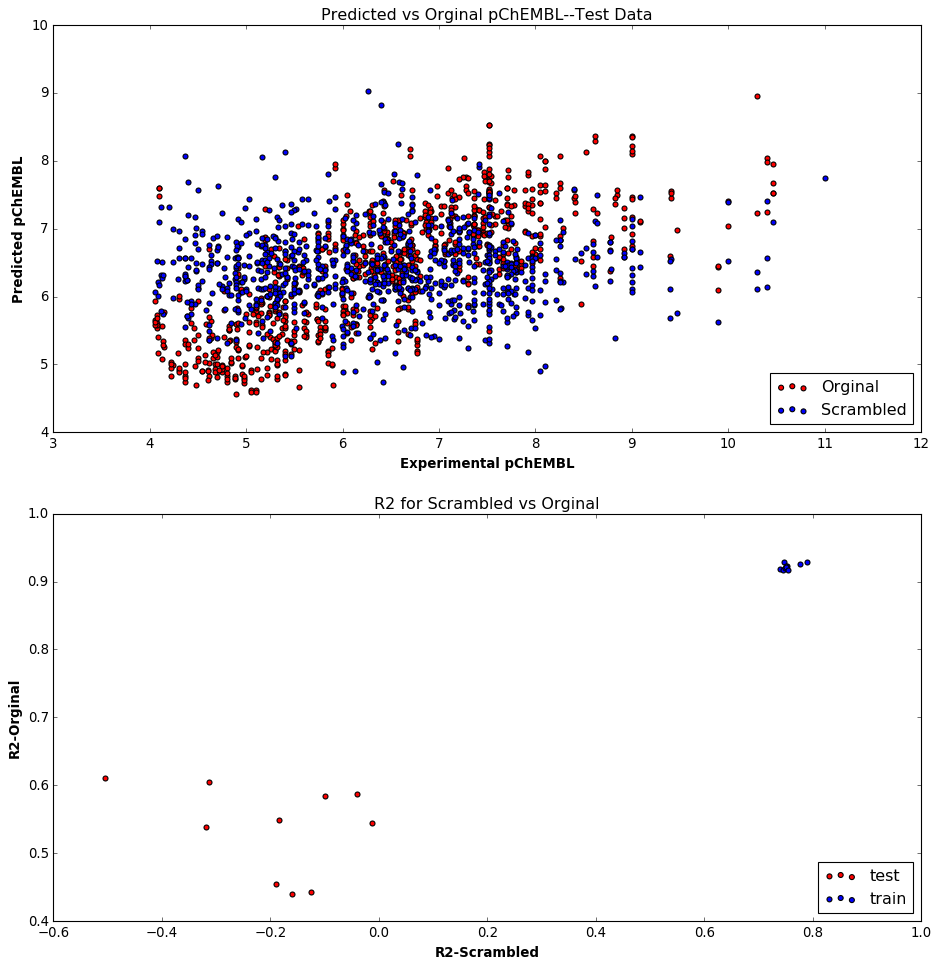

In [79]:
scrambled_pair_prediction(RandomForestRegressor(),X_reduced,y,1)

### KNN Regression

The mean R2 score for KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') is 0.6421045626565318--Train
The mean R2 score for KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') is 0.43988015812259507--Test
The mean MSE score for KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') is 0.6135070352186589--Train
The mean MSE score for KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') is 0.9480349641860464--Test


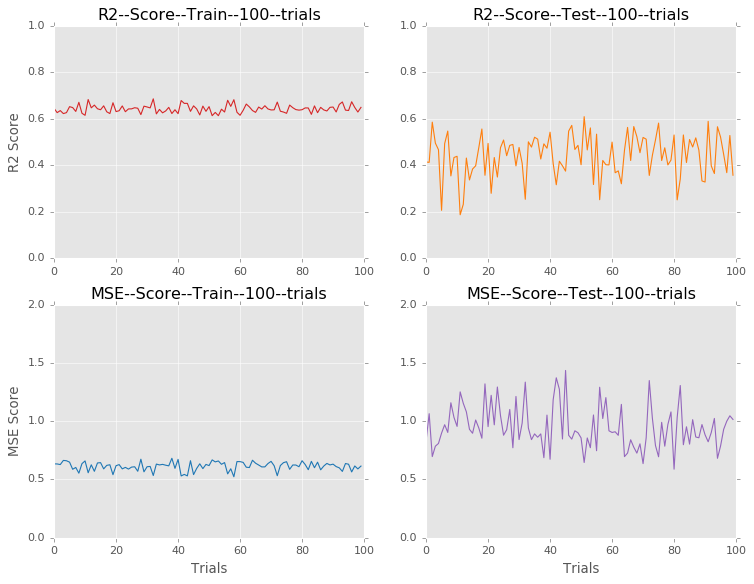

In [40]:
r2_train_knn,r2_test_knn,mse_train_knn,mse_test_knn=machine_learning_train(KNeighborsRegressor(),X_reduced,y,100)

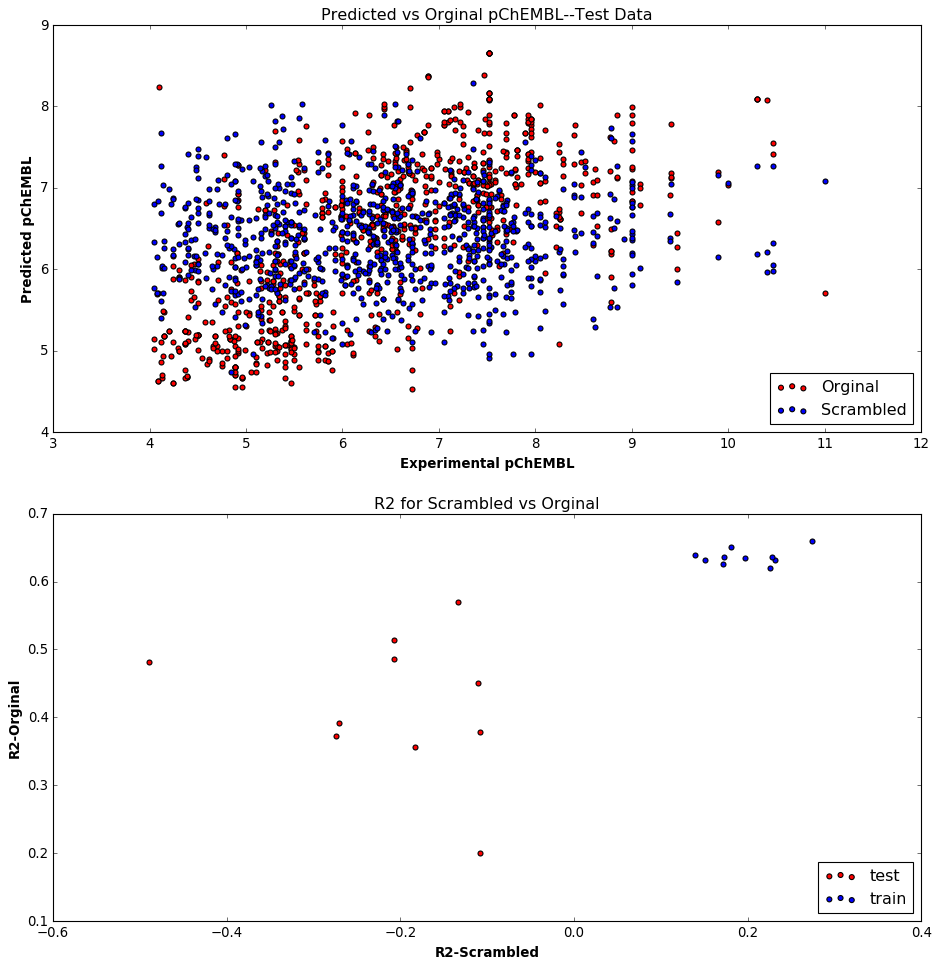

In [80]:
scrambled_pair_prediction(KNeighborsRegressor(),X_reduced,y,1)

In [129]:
style.use("ggplot")
def boxplots_for_machine_learning(Type):
    final_r2=np.array([r2_train_gb,r2_test_gb,r2_train_svr,r2_test_svr,
                      r2_train_lr,r2_test_lr,r2_train_ridge,r2_test_ridge,r2_train_lasso,r2_test_lasso,r2_train_rf,r2_test_rf,
                      r2_train_knn,r2_test_knn]).reshape(-1,)
    
    
    final_MSE=np.array([mse_train_gb,mse_test_gb,mse_train_svr,mse_test_svr,
                      mse_train_lr,mse_test_lr,mse_train_ridge,mse_test_ridge,mse_train_lasso,mse_test_lasso,mse_train_rf,mse_test_rf,
                      mse_train_knn,mse_test_knn]).reshape(-1,)
    
    train_test=[]
    final_machine_learning_algorithm_names=[]
    for i in range(7):
        if i==0:
            for i in range(1,10001):
                final_machine_learning_algorithm_names.append("GradientBoosting")
                if i<=5000:
                    train_test.append("train")
                else:
                    train_test.append("test")
        elif i==1:
            for i in range(1,10001):
                final_machine_learning_algorithm_names.append("SupportVectorRegression")
                if i<=5000:
                    train_test.append("train")
                else:
                    train_test.append("test")
        elif i==2:
            for i in range(1,10001):
                final_machine_learning_algorithm_names.append("LinearRegression")
                if i<=5000:
                    train_test.append("train")
                else:
                    train_test.append("test")
        
        elif i==3:
            for i in range(1,10001):
                final_machine_learning_algorithm_names.append("RidgeRegression")
                if i<=5000:
                    train_test.append("train")
                else:
                    train_test.append("test")
        elif i==4:
            for i in range(1,10001):
                final_machine_learning_algorithm_names.append("LassoRegression")
                if i<=5000:
                    train_test.append("train")
                else:
                    train_test.append("test")
        elif i==5:
            for i in range(1,10001):
                final_machine_learning_algorithm_names.append("RandomForest")
                if i<=5000:
                    train_test.append("train")
                else:
                    train_test.append("test")
        elif i==6:
            for i in range(1,10001):
                final_machine_learning_algorithm_names.append("KNN")
                if i<=5000:
                    train_test.append("train")
                else:
                    train_test.append("test")
    

    final_machine_learning_algorithm_names=np.array(final_machine_learning_algorithm_names).reshape(-1,)
    
    df=pd.DataFrame({"Machine_Learning_Algorithm":final_machine_learning_algorithm_names,
                   "R2":final_r2
                     ,'MSE':final_MSE,'train_test':train_test})
    
    if Type=="R2":
        sns.boxplot(x="Machine_Learning_Algorithm", y="R2",
            hue="train_test", palette=["m", "g"],
            data=df)
        sns.despine(offset=10, trim=True)
        ax=plt.gca()
        ax.set_title("R2 Benchmark for Train and Test",fontweight="bold")
        fig=plt.gcf()
        fig.set_size_inches(14,14)
    else:
        sns.boxplot(x="Machine_Learning_Algorithm", y="MSE",
            hue="train_test", palette=["m", "g"],
            data=df)
        sns.despine(offset=10, trim=True)
        ax=plt.gca()
        ax.set_title("MSE Benchmark for Train and Test",fontweight="bold")
        fig=plt.gcf()
        fig.set_size_inches(14,14)
        
   
    
        
    
    
    
       
                
    return df

,Machine_Learning_Algorithm,R2,MSE,train_test
0,GradientBoosting,0.903614,0.162304,train
1,GradientBoosting,0.904343,0.173758,train
2,GradientBoosting,0.901713,0.163300,train
3,GradientBoosting,0.912929,0.150606,train
4,GradientBoosting,0.899683,0.179201,train
...,...,...,...,...
1395,KNN,0.520551,0.787198,test
1396,KNN,0.446541,0.930415,test
1397,KNN,0.367926,0.999948,test
1398,KNN,0.527620,1.046453,test


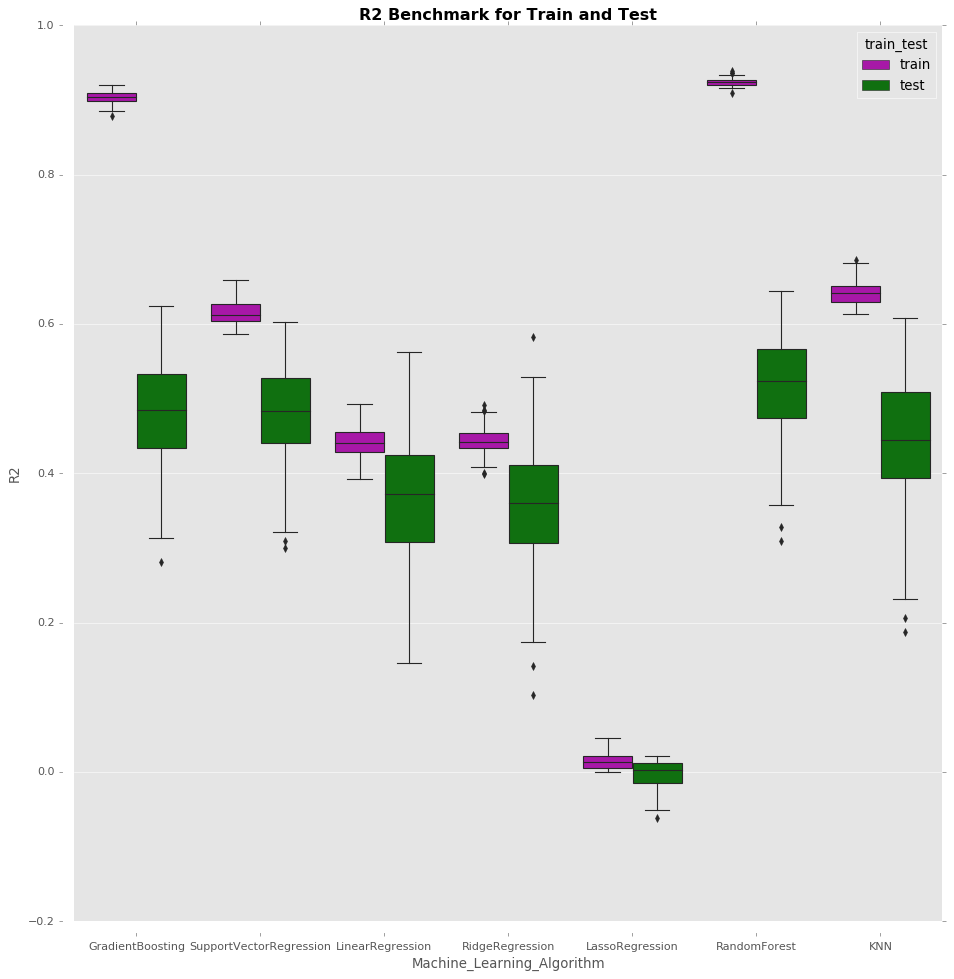

In [132]:
boxplots_for_machine_learning("R2")

,Machine_Learning_Algorithm,R2,MSE,train_test
0,GradientBoosting,0.903614,0.162304,train
1,GradientBoosting,0.904343,0.173758,train
2,GradientBoosting,0.901713,0.163300,train
3,GradientBoosting,0.912929,0.150606,train
4,GradientBoosting,0.899683,0.179201,train
...,...,...,...,...
1395,KNN,0.520551,0.787198,test
1396,KNN,0.446541,0.930415,test
1397,KNN,0.367926,0.999948,test
1398,KNN,0.527620,1.046453,test


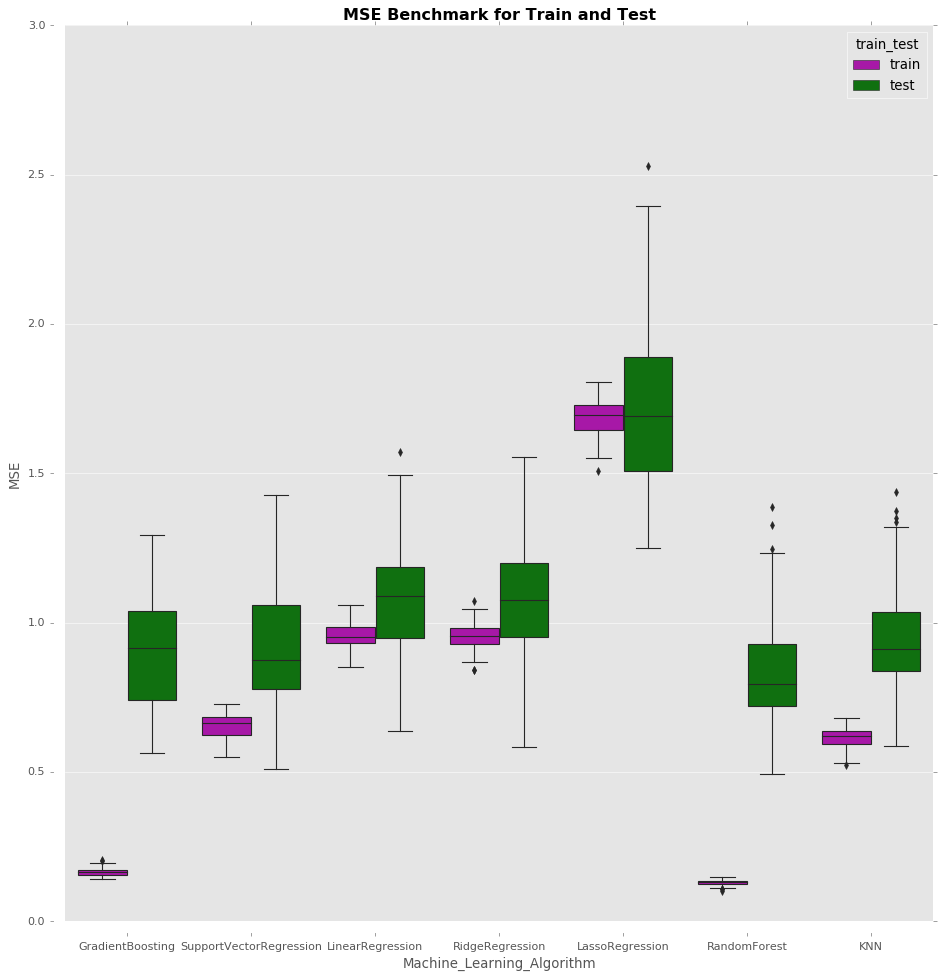

In [133]:
boxplots_for_machine_learning("MSE")